In [6]:
from sklearn.datasets import make_classification

In [19]:
import  matplotlib.pyplot as plt
import numpy as np

In [16]:
X,Y= make_classification(n_classes=2,n_clusters_per_class=1,n_samples=400,n_features=2,n_informative=2,n_redundant=0,random_state=3)

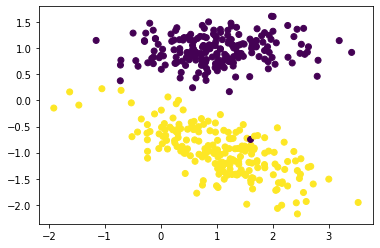

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [33]:
#converting class 0 to class -1
Y[Y==0]=-1

In [55]:
class SVM:
    def __init__(self,c=1.0):
        self.c=c
        self.w=0
        self.b=0
    def hingeloss(self,w,b,x,y):
        loss=0.0
        loss+=0.5*np.dot(w,w.T)
        m=x.shape[0]
        for i in range(m):
            ti=y[i]*(np.dot(w,x[i].T )+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]
    def fit(self,x,y,batch_size=100,learning_rate=0.001,max_itr=100):
        n=x.shape[1]
        m=x.shape[0]
        c=self.c
        w=np.zeros((1,n))
        bias=0
        losses=[]
        for i in range(max_itr):
            loss=self.hingeloss(w,bias,x,y)
            losses.append(loss)
            ids=np.arange(m)
            np.random.shuffle(ids)
            #batch gradient with random shuffling
            for batch in range(0,m,batch_size):
                #assuming 0 gradient
                gradw=0
                gradb=0
                for j in range(batch,batch+batch_size):
                    if j<m:
                        i=ids[j]
                        ti=y[i]*(np.dot(w,x[i].T )+bias)
                        if ti<1:
                            gradw+=c*y[i]*x[i]
                            gradb+=c*y[i]
                #gradient is ready!
                #applying gradient descent method
                w=w-learning_rate*w+learning_rate*gradw
                bias=bias+learning_rate*gradb
        self.w=w
        self.b=bias
        return w,bias,losses
                    
                
                
        
        
            
        

In [56]:
model=SVM()
w,bias,losses=model.fit(X,Y)

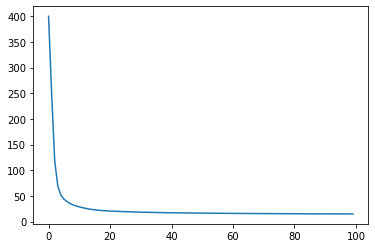

In [59]:
plt.plot(losses)
plt.show()

#LETS VISUALIZE THE HYPERPLANE SPLITTING THE TWO CLASSES,SUPPORT VECTORS(NEAREST POINTS),POSITIVE AND NEGATIVE HYPERPLANES

In [73]:
def plothyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2 #wx+b=0
    xp=(1-w1*x1-b)/w2 #wx+b=1
    xn=(-1-w1*x1-b)/w2 #wx+b=-1
    plt.plot(x1,x2,label="HYPERPLANE WX+B=0")
    plt.plot(x1,xp,label="+VE HYPERPLANE WX+B=1")
    plt.plot(x1,xn,label="-VE HYPERPLANE WX+B=-1")
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

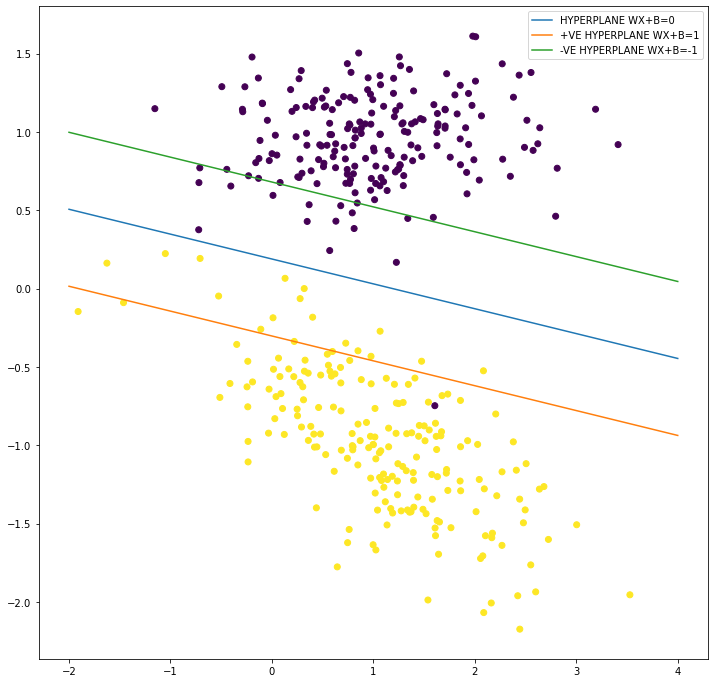

In [74]:
plothyperplane(w[0,0],w[0,1],bias)

#VISUALIZING SUPPORT VECTORS(NEAREST POINTS),POSITIVE AND NEGATIVE HYPERPLANES